# Classification system

This exercise uses MNIST dataset and several ML algorithms to correctly analyze and classify some images (numbers).

## Fecthing data

In [10]:
# libs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

In [11]:
# dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
X, y = mnist['data'], mnist['target']
print(f'X shape: {X.shape}\nY shape: {y.shape}')

X shape: (70000, 784)
Y shape: (70000,)


With this, we see there are 70,000 images, with each image having 784 features (28 x 28 pixels)

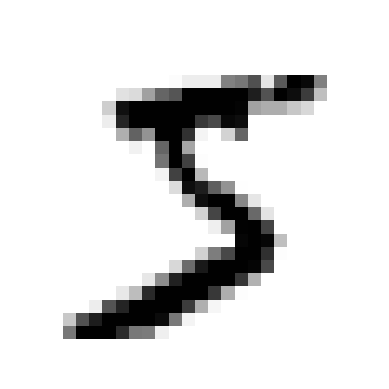

In [18]:
# first look into a pixel
import matplotlib as mpl

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [19]:
# it looks like a 5, but we can confirm it
y[0]

'5'

In [25]:
# we will cast the string to a number
y = y.astype(np.uint8)
y[0]

5

In [27]:
# let's subset out set into train/test sets
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]

# we don't need to shuffle the dataset because it's already shuffled

## Binary Classifier

For now, we will only try to classify one number (5), and then generalize to the full training set. We'll start with *Stochastic Gradient Descent* classifier.

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

# it correctly predicts that "some_digit" is in fact a number 5!!!

array([ True])

## Performance Measure

### First approach

In [34]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
i = 1

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(f'Split {i}: {n_correct/len(y_pred)}\n')
    i+=1

Split 1: 0.9669

Split 2: 0.91625

Split 3: 0.96785

